In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.activations import relu
from tensorflow.keras.utils import to_categorical
from keras.activations import sigmoid
import plotly.express as px, plotly.graph_objects as go
import pickle
from sklearn.model_selection import train_test_split

data = pd.read_hdf(r"C:\Users\Micha\Documents\Python Research Shit\newData.h5")

In [2]:
data

,SiO2,Na2O,Li2O,K2O,Rb2O,Cs2O,Resistivity293K,Resistivity373K,Resistivity423K,Resistivity573K,Resistivity1073K,Resistivity1273K,Resistivity1473K,Resistivity1673K,YoungModulus,ShearModulus,PoissonRatio
0,66.70000,33.30000,NaN,NaN,NaN,NaN,NaN,6.388374,5.520852,3.826685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,80.00134,19.99866,NaN,NaN,NaN,NaN,NaN,NaN,6.650000,4.490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49.97608,50.02391,NaN,NaN,NaN,NaN,NaN,NaN,4.250001,2.750001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72.00000,28.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.3,24.42,0.235
4,60.00000,40.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,23.24,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,80.00000,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,75.00000,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,70.00000,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,65.00000,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.fillna(0)

,SiO2,Na2O,Li2O,K2O,Rb2O,Cs2O,Resistivity293K,Resistivity373K,Resistivity423K,Resistivity573K,Resistivity1073K,Resistivity1273K,Resistivity1473K,Resistivity1673K,YoungModulus,ShearModulus,PoissonRatio
0,66.70000,33.30000,0.0,0.0,0.0,0.0,0.0,6.388374,5.520852,3.826685,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,80.00134,19.99866,0.0,0.0,0.0,0.0,0.0,0.000000,6.650000,4.490000,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,49.97608,50.02391,0.0,0.0,0.0,0.0,0.0,0.000000,4.250001,2.750001,0.0,0.0,0.0,0.0,0.0,0.00,0.000
3,72.00000,28.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,60.3,24.42,0.235
4,60.00000,40.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,59.0,23.24,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,80.00000,0.00000,0.0,0.0,0.0,20.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1278,75.00000,0.00000,0.0,0.0,0.0,25.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1279,70.00000,0.00000,0.0,0.0,0.0,30.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1280,65.00000,0.00000,0.0,0.0,0.0,35.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [4]:
count = 0
for index, row in data.iterrows():
    if data['Resistivity573K'][index] > 0:
        count += 1

count

489

In [5]:
count = 0
for index, row in data.iterrows():
    if data['Na2O'][index] > 0 and data['Resistivity573K'][index] > 0:
        count += 1

count

224

<Axes: xlabel='Na2O', ylabel='Resistivity573K'>

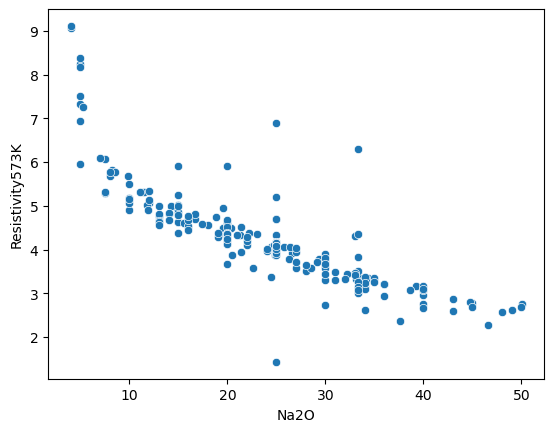

In [6]:
sns.scatterplot(data = data[data['Na2O'] > 0], x = 'Na2O', y = 'Resistivity573K')

In [7]:
valAlkSil = pd.DataFrame()

In [8]:
valAlkSil = data

In [9]:
valAlkSil

warnings.filterwarnings("ignore")
valAlkSil['CalcResistivity573K'] = 0
valAlkSil['IonicConductivity'] = 0
valAlkSil['ActivationEnergy'] = 0
valAlkSil['PercentError'] = 0
valAlkSil['RoundedSiO2'] = 0
valAlkSil['RoundedLi2O'] = 0
valAlkSil['RoundedNa2O'] = 0
valAlkSil['RoundedK2O'] = 0
valAlkSil['RoundedRb2O'] = 0
valAlkSil['RoundedCs2O'] = 0
df = pd.DataFrame()
count = 0
x = 0
for index, row in valAlkSil.iterrows():
    if valAlkSil['Resistivity573K'][index] != 0 and valAlkSil['Resistivity573K'][index] <= 10:
        #print(valAlkSil['Resistivity573K'][index])
        count += 1

for index, row in valAlkSil.iterrows():
    valAlkSil['RoundedSiO2'][index] = np.round(valAlkSil['SiO2'][index]/5)*5
    if valAlkSil['Li2O'][index] != 0:
        valAlkSil['RoundedLi2O'][index] = np.round(valAlkSil['Li2O'][index]/5)*5
    if valAlkSil['Na2O'][index] != 0:
        valAlkSil['RoundedNa2O'][index] = np.round(valAlkSil['Na2O'][index]/5)*5
    if valAlkSil['K2O'][index] != 0:
        valAlkSil['RoundedK2O'][index] = np.round(valAlkSil['K2O'][index]/5)*5
    if valAlkSil['Rb2O'][index] != 0:
        valAlkSil['RoundedRb2O'][index] = np.round(valAlkSil['Rb2O'][index]/5)*5
    if valAlkSil['Cs2O'][index] != 0:
        valAlkSil['RoundedCs2O'][index] = np.round(valAlkSil['Cs2O'][index]/5)*5
#print(count)
#valAlkSil
calcResistivityCount = 0
temp = [293, 373, 423, 573, 1073, 1273, 1473, 1673]
from scipy.constants import k
count = 0
total_count = 0
count_Error = 0
#valAlkSil['ActivationEnergy'] = 0
full_df = pd.DataFrame(columns = ["SiO2", "Li2O","Na2O" , "K2O", "Rb2O", "Cs2O", "Permittivity", "YoungModulus", "Resistivity273K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "Density293K"])

for index, row in valAlkSil.iterrows():
    resistivityCount = 0
    xAxis = []
    yAxis = []
    for i in temp:
        column_name = f"Resistivity{i}K"
        resistivityValue = row[column_name]
        if resistivityValue > 0 and resistivityValue < 15:
            y = np.log((1/(10**resistivityValue))*i)
            x = 1000 / i
            xAxis.append(x)
            yAxis.append(y)
            resistivityCount += 1
    if resistivityCount >= 2:
        total_count += 1
        calcResistivityCount += 1
        result = stats.linregress(xAxis, yAxis)
        valAlkSil['ActivationEnergy'][index] = -result.slope * ((0.198457))
        valAlkSil['CalcResistivity573K'][index] = -(result.slope*(1000/573) + result.intercept)
        #print(-result.slope * ((8.6173303 * 10**-5 * 1000)/(2.314)))
    if valAlkSil['Resistivity573K'][index] != 0 and valAlkSil['CalcResistivity573K'][index] == 0 and valAlkSil['Resistivity573K'][index] < 20:
        count += 1
        x = valAlkSil['Resistivity573K'][index]
        x = 10**x
        x = 1/x
        # x = np.log(x*573) 
        valAlkSil['IonicConductivity'][index] = x #10**x
        full_df = full_df._append(valAlkSil.iloc[index], ignore_index = True)
    elif valAlkSil['CalcResistivity573K'][index] != 0 and valAlkSil['Resistivity573K'][index] == 0 and valAlkSil['CalcResistivity573K'][index] < 20:
        count += 1
        x = valAlkSil['CalcResistivity573K'][index]
        x = 10**x
        x = 1/x
        #x = np.log(x*573) 
        valAlkSil['IonicConductivity'][index] = x #10**x
        full_df = full_df._append(valAlkSil.iloc[index], ignore_index = True)
    elif valAlkSil['Resistivity573K'][index] < 20 and valAlkSil['CalcResistivity573K'][index] != 0 and valAlkSil['Resistivity573K'][index] != 0  and valAlkSil['CalcResistivity573K'][index] < 10:
        count += 1
        x = valAlkSil['Resistivity573K'][index]
        x = 10**x
        x = 1/x
        #x = np.log(x*573)
        valAlkSil['IonicConductivity'][index] = x # 10**x
        valAlkSil['PercentError'][index] = np.abs((valAlkSil['Resistivity573K'][index] - valAlkSil['CalcResistivity573K'][index])/100)
        full_df = full_df._append(valAlkSil.iloc[index], ignore_index = True)
    else:
        if valAlkSil['Resistivity573K'][index] == 0 and valAlkSil['CalcResistivity573K'][index] == 0:
            count_Error += 1
        #valAlkSil['Resistivity573K'][index] = np.NaN

''' 
if(-result.slope * ((8.6173303 * 10**-5 * 1000)/(2.314)) < 0):
    print(index)
'''
#print(total_count)
print(count)
print(count_Error)
print(calcResistivityCount)

474
0
458


<Axes: xlabel='YoungModulus', ylabel='Count'>

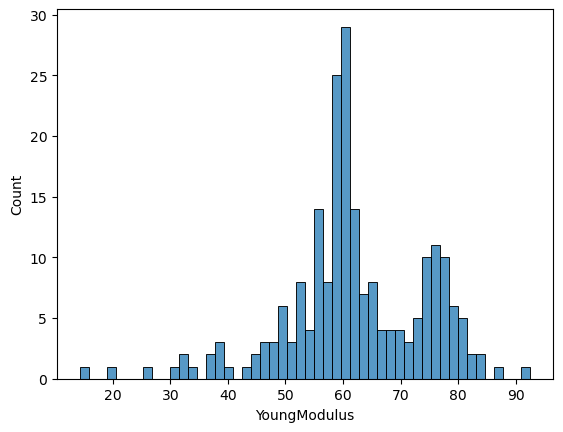

In [10]:
sns.histplot(data = valAlkSil[valAlkSil["YoungModulus"] > 0], x = "YoungModulus" , bins=50)

In [11]:
valAlkSil[["SiO2", "Li2O","Na2O" , "K2O", "Rb2O", "Cs2O", "YoungModulus", "Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "CalcResistivity573K", "IonicConductivity",	"ActivationEnergy",	"PercentError", "RoundedSiO2", "RoundedLi2O", "RoundedNa2O", "RoundedK2O", "RoundedRb2O", "RoundedCs2O"]]

,SiO2,Li2O,Na2O,K2O,Rb2O,Cs2O,YoungModulus,Resistivity293K,Resistivity373K,Resistivity423K,...,CalcResistivity573K,IonicConductivity,ActivationEnergy,PercentError,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O
0,66.70000,NaN,33.30000,NaN,NaN,NaN,NaN,NaN,6.388374,5.520852,...,2.464657,0.000149,1.342867,0.013620,65,NaN,35.0,NaN,NaN,NaN
1,80.00134,NaN,19.99866,NaN,NaN,NaN,NaN,NaN,NaN,6.650000,...,3.987721,0.000032,1.692253,0.005023,80,NaN,20.0,NaN,NaN,NaN
2,49.97608,NaN,50.02391,NaN,NaN,NaN,NaN,NaN,NaN,4.250001,...,-0.018774,0.001778,1.204915,0.027688,50,NaN,50.0,NaN,NaN,NaN
3,72.00000,NaN,28.00000,NaN,NaN,NaN,60.3,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,70,NaN,30.0,NaN,NaN,NaN
4,60.00000,NaN,40.00000,NaN,NaN,NaN,59.0,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,60,NaN,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,80.00000,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,80,NaN,NaN,NaN,NaN,20.0
1278,75.00000,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,75,NaN,NaN,NaN,NaN,25.0
1279,70.00000,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,70,NaN,NaN,NaN,NaN,30.0
1280,65.00000,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,65,NaN,NaN,NaN,NaN,35.0


In [12]:
valAlkSil = valAlkSil.sort_values('SiO2').reset_index()
#df.drop(columns=['index'], inplace=True)
valAlkSil

,index,SiO2,Na2O,Li2O,K2O,Rb2O,Cs2O,Resistivity293K,Resistivity373K,Resistivity423K,...,CalcResistivity573K,IonicConductivity,ActivationEnergy,PercentError,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O
0,799,33.00000,NaN,67.00000,NaN,NaN,NaN,5.848379,3.972358,3.160191,...,-2.630696,0.000000e+00,1.239904,0.0,35,65.0,NaN,NaN,NaN,NaN
1,963,33.30000,NaN,66.70000,NaN,NaN,NaN,NaN,3.949004,3.126490,...,-2.792598,0.000000e+00,1.264832,0.0,35,65.0,NaN,NaN,NaN,NaN
2,774,33.33333,NaN,66.66666,NaN,NaN,NaN,5.818847,3.966558,3.164666,...,-2.574192,0.000000e+00,1.225089,0.0,35,65.0,NaN,NaN,NaN,NaN
3,924,37.00000,NaN,63.00000,NaN,NaN,NaN,7.400000,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,35,65.0,NaN,NaN,NaN,NaN
4,635,39.70000,NaN,60.30000,NaN,NaN,NaN,5.439984,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,40,60.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,206,97.60000,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,100,NaN,0.0,NaN,NaN,NaN
1278,994,97.60000,NaN,NaN,2.4,NaN,NaN,NaN,16.384540,14.460000,...,18.290459,0.000000e+00,2.872496,0.0,100,NaN,NaN,0.0,NaN,NaN
1279,1166,98.00000,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.096478e-09,0.000000,0.0,100,NaN,NaN,0.0,NaN,NaN
1280,1141,98.30000,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,100,NaN,NaN,0.0,NaN,NaN


In [13]:
valAlkSil[[ "RoundedLi2O"]].value_counts()

RoundedLi2O
35.0           90
25.0           49
30.0           45
15.0           31
40.0           31
20.0           29
10.0           28
50.0           15
5.0            10
45.0           10
55.0            6
60.0            5
65.0            4
Name: count, dtype: int64

In [14]:
df2 = valAlkSil[["SiO2", "Li2O","Na2O" , "K2O", "Rb2O", "Cs2O", "YoungModulus", "Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "CalcResistivity573K", "IonicConductivity",	"ActivationEnergy",	"PercentError", "ShearModulus", "RoundedSiO2", "RoundedLi2O", "RoundedNa2O", "RoundedK2O", "RoundedRb2O", "RoundedCs2O"]].groupby(["RoundedSiO2", "RoundedLi2O", "RoundedNa2O", "RoundedK2O", "RoundedRb2O", "RoundedCs2O"], dropna=False)

In [15]:
df2 = df2.agg(mean_ym=('YoungModulus', 'mean'), std_ym=('YoungModulus', 'std'), count_ym=('YoungModulus', 'count'),
             mean_ic=('IonicConductivity', 'mean'), std_ic=('IonicConductivity', 'std'), count_ic=('IonicConductivity', 'count'),
             mean_ae=('ActivationEnergy', 'mean'), std_ae=('ActivationEnergy', 'std'), count_ae=('ActivationEnergy', 'count'),
             mean_sm=('ShearModulus', 'mean'), std_sm=('ShearModulus', 'std'), count_sm=('ShearModulus', 'count')).reset_index()

In [16]:
df2

,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O,mean_ym,std_ym,count_ym,mean_ic,std_ic,count_ic,mean_ae,std_ae,count_ae,mean_sm,std_sm,count_sm
0,35,65.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,4,0.932456,0.621854,4,NaN,NaN,0
1,40,60.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,5,0.247757,0.554002,5,NaN,NaN,0
2,40,NaN,60.0,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,5,0.000000,0.000000,5,NaN,NaN,0
3,45,55.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,6,0.258163,0.632368,6,NaN,NaN,0
4,45,NaN,NaN,55.0,NaN,NaN,NaN,NaN,0,0.000000e+00,NaN,1,0.000000,NaN,1,NaN,NaN,0
5,50,50.0,NaN,NaN,NaN,NaN,87.600000,NaN,1,6.087343e-05,2.357618e-04,15,0.455147,0.672566,15,35.700000,NaN,1
6,50,NaN,50.0,NaN,NaN,NaN,NaN,NaN,0,4.017635e-04,8.841029e-04,22,0.350065,0.589187,22,NaN,NaN,0
7,50,NaN,NaN,50.0,NaN,NaN,NaN,NaN,0,2.375724e-05,3.359781e-05,2,0.912849,1.290964,2,NaN,NaN,0
8,55,45.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2.946748e-06,9.318435e-06,10,0.306517,0.646361,10,NaN,NaN,0
9,55,NaN,45.0,NaN,NaN,NaN,69.900000,NaN,1,1.024268e-03,1.516634e-03,14,0.199406,0.508044,14,NaN,NaN,0


In [17]:
np.mean(10 + 3 * np.random.randn(10000))

10.017616867670107

In [18]:
final_df = pd.DataFrame(columns = ["SiO2", "Li2O","Na2O" , "K2O", "Rb2O", "Cs2O", "YoungModulus", "Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "CalcResistivity573K", "IonicConductivity",	"ActivationEnergy",	"PercentError", "ShearModulus"])

In [19]:
values = np.arange(30, 100.25, 0.25)
first_column = np.repeat(values, 5)

# Initialize an empty DataFrame
df = pd.DataFrame({'Value': first_column})

# Add the remaining 5 columns with NaN values
for i in range(5):
    df[f'Column_{i+1}'] = np.nan

# Populate the columns in a round-robin fashion with values minus 100 (and ensure all values are positive)
for i in range(len(values)):
    for j in range(5):
        df.loc[i*5 + j, f'Column_{j+1}'] = 100 - values[i]

# Show the resulting DataFrame
df.head(25)  # Display the first 25 rows for verification

,Value,Column_1,Column_2,Column_3,Column_4,Column_5
0,30.00,70.00,NaN,NaN,NaN,NaN
1,30.00,NaN,70.00,NaN,NaN,NaN
2,30.00,NaN,NaN,70.00,NaN,NaN
3,30.00,NaN,NaN,NaN,70.00,NaN
4,30.00,NaN,NaN,NaN,NaN,70.00
5,30.25,69.75,NaN,NaN,NaN,NaN
6,30.25,NaN,69.75,NaN,NaN,NaN
7,30.25,NaN,NaN,69.75,NaN,NaN
8,30.25,NaN,NaN,NaN,69.75,NaN
9,30.25,NaN,NaN,NaN,NaN,69.75


In [20]:
new_column_names = {
    'Value': 'SiO2',
    'Column_1': 'Li2O',
    'Column_2': 'Na2O',
    'Column_3': 'K2O',
    'Column_4': 'Rb2O',
    'Column_5': 'Cs2O'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [21]:
df

,SiO2,Li2O,Na2O,K2O,Rb2O,Cs2O
0,30.0,70.0,NaN,NaN,NaN,NaN
1,30.0,NaN,70.0,NaN,NaN,NaN
2,30.0,NaN,NaN,70.0,NaN,NaN
3,30.0,NaN,NaN,NaN,70.0,NaN
4,30.0,NaN,NaN,NaN,NaN,70.0
...,...,...,...,...,...,...
1400,100.0,0.0,NaN,NaN,NaN,NaN
1401,100.0,NaN,0.0,NaN,NaN,NaN
1402,100.0,NaN,NaN,0.0,NaN,NaN
1403,100.0,NaN,NaN,NaN,0.0,NaN


In [22]:
df = df.assign(YoungModulus=None, Resistivity293K=None, Resistivity373K=None, Resistivity423K=None, Resistivity573K=None, Resistivity1073K=None, Resistivity1273K=None, Resistivity1473K=None, Resistivity1673K=None, CalcResistivity573K=None, IonicConductivity=None,	ActivationEnergy=None,	PercentError=None, ShearModulus=None, RoundedSiO2=None, RoundedLi2O=None, RoundedNa2O=None, RoundedK2O=None, RoundedRb2O=None, RoundedCs2O=None)

In [23]:
for index, row in df.iterrows():
    df['RoundedSiO2'][index] = np.round(df['SiO2'][index]/5)*5
    if df['Li2O'][index] != 0:
        df['RoundedLi2O'][index] = np.round(df['Li2O'][index]/5)*5
    if df['Na2O'][index] != 0:
        df['RoundedNa2O'][index] = np.round(df['Na2O'][index]/5)*5
    if df['K2O'][index] != 0:
        df['RoundedK2O'][index] = np.round(df['K2O'][index]/5)*5
    if df['Rb2O'][index] != 0:
        df['RoundedRb2O'][index] = np.round(df['Rb2O'][index]/5)*5
    if df['Cs2O'][index] != 0:
        df['RoundedCs2O'][index] = np.round(df['Cs2O'][index]/5)*5

In [24]:
df.fillna(0)

,SiO2,Li2O,Na2O,K2O,Rb2O,Cs2O,YoungModulus,Resistivity293K,Resistivity373K,Resistivity423K,...,IonicConductivity,ActivationEnergy,PercentError,ShearModulus,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O
0,30.0,70.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,30.0,70.0,0.0,0.0,0.0,0.0
1,30.0,0.0,70.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,30.0,0.0,70.0,0.0,0.0,0.0
2,30.0,0.0,0.0,70.0,0.0,0.0,0,0,0,0,...,0,0,0,0,30.0,0.0,0.0,70.0,0.0,0.0
3,30.0,0.0,0.0,0.0,70.0,0.0,0,0,0,0,...,0,0,0,0,30.0,0.0,0.0,0.0,70.0,0.0
4,30.0,0.0,0.0,0.0,0.0,70.0,0,0,0,0,...,0,0,0,0,30.0,0.0,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,100.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0
1401,100.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0
1402,100.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0
1403,100.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0


In [25]:
valAlkSil = pd.concat([valAlkSil, df], ignore_index=True, sort=False)
valAlkSil = valAlkSil.drop(['index'], axis=1)

In [26]:
for index, row in valAlkSil.iterrows():
    for i, row in df2.iterrows():
        if valAlkSil['RoundedNa2O'][index] == valAlkSil['RoundedNa2O'][i] and valAlkSil['RoundedLi2O'][index] == valAlkSil['RoundedLi2O'][i] and valAlkSil['RoundedK20'][index] == valAlkSil['RoundedK2O'][i] and valAlkSil['RoundedRb2O'][index] == valAlkSil['RoundedRb2O'][i] and valAlkSil['RoundedCs2O'][index] == valAlkSil['RoundedCs2O'][i]:
            if valAlkSil['IonicConductivity'][index] == 0:
                valAlkSil['IonicConductivity'][index] = np.mean(df2['mean_ic'][i] + df2['std_ic'][i] * np.random.randn())
            if valAlkSil['ActivationEnergy'][index] == 0:
                valAlkSil['ActivationEnergy'][index] = np.mean(df2['mean_ae'][i] + df2['std_ae'][i] * np.random.randn())
            if valAlkSil['YoungModulus'][index] == 0:
                valAlkSil['YoungModulus'][index] = np.mean(df2['mean_ym'][i] + df2['std_ym'][i] * np.random.randn())
            if valAlkSil['ShearModulus'][index] == 0:
                valAlkSil['ShearModulus'][index] = np.mean(df2['mean_sm'][i] + df2['std_sm'][i] * np.random.randn())


In [27]:
df2

,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O,mean_ym,std_ym,count_ym,mean_ic,std_ic,count_ic,mean_ae,std_ae,count_ae,mean_sm,std_sm,count_sm
0,35,65.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,4,0.932456,0.621854,4,NaN,NaN,0
1,40,60.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,5,0.247757,0.554002,5,NaN,NaN,0
2,40,NaN,60.0,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,5,0.000000,0.000000,5,NaN,NaN,0
3,45,55.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000e+00,0.000000e+00,6,0.258163,0.632368,6,NaN,NaN,0
4,45,NaN,NaN,55.0,NaN,NaN,NaN,NaN,0,0.000000e+00,NaN,1,0.000000,NaN,1,NaN,NaN,0
5,50,50.0,NaN,NaN,NaN,NaN,87.600000,NaN,1,6.087343e-05,2.357618e-04,15,0.455147,0.672566,15,35.700000,NaN,1
6,50,NaN,50.0,NaN,NaN,NaN,NaN,NaN,0,4.017635e-04,8.841029e-04,22,0.350065,0.589187,22,NaN,NaN,0
7,50,NaN,NaN,50.0,NaN,NaN,NaN,NaN,0,2.375724e-05,3.359781e-05,2,0.912849,1.290964,2,NaN,NaN,0
8,55,45.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2.946748e-06,9.318435e-06,10,0.306517,0.646361,10,NaN,NaN,0
9,55,NaN,45.0,NaN,NaN,NaN,69.900000,NaN,1,1.024268e-03,1.516634e-03,14,0.199406,0.508044,14,NaN,NaN,0


In [28]:
valAlkSil.drop_duplicates()

,SiO2,Na2O,Li2O,K2O,Rb2O,Cs2O,Resistivity293K,Resistivity373K,Resistivity423K,Resistivity573K,...,CalcResistivity573K,IonicConductivity,ActivationEnergy,PercentError,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O
0,33.00000,NaN,67.00000,NaN,NaN,NaN,5.848379,3.972358,3.160191,NaN,...,-2.630696,0.0,1.239904,0.0,35,65.0,NaN,NaN,NaN,NaN
1,33.30000,NaN,66.70000,NaN,NaN,NaN,NaN,3.949004,3.126490,NaN,...,-2.792598,0.0,1.264832,0.0,35,65.0,NaN,NaN,NaN,NaN
2,33.33333,NaN,66.66666,NaN,NaN,NaN,5.818847,3.966558,3.164666,NaN,...,-2.574192,0.0,1.225089,0.0,35,65.0,NaN,NaN,NaN,NaN
3,37.00000,NaN,63.00000,NaN,NaN,NaN,7.400000,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.0,35,65.0,NaN,NaN,NaN,NaN
4,39.70000,NaN,60.30000,NaN,NaN,NaN,5.439984,NaN,NaN,NaN,...,0.000000,0.0,0.000000,0.0,40,60.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,100.00000,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,None,NaN,NaN,NaN,NaN
2683,100.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,None,NaN,NaN,NaN
2684,100.00000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,None,NaN,NaN
2685,100.00000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,None,NaN


In [29]:
#final_df = valAlkSil

In [30]:
#final_df = final_df.drop(columns = ["Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K"])

In [31]:
final_df = pd.DataFrame(columns = ["SiO2", "Li2O", "Na2O", "K2O", "Rb2O", "Cs2O", "YoungModulus", "Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "CalcResistivity573K", "IonicConductivity", "ActivationEnergy", "PercentError", "ShearModulus", "RoundedSiO2", "RoundedLi2O",	"RoundedNa2O", "RoundedK2O", "RoundedRb2O",	"RoundedCs2O"])
count = 0
for index, row in valAlkSil.iterrows():
    if valAlkSil['ActivationEnergy'][index] != 0:
       # final_df = final_df.append(valAlkSil.iloc[index], ignore_index = True)
        final_df = final_df._append(valAlkSil.iloc[index], ignore_index = True)
        count += 1
count

1863

In [32]:
final_df = final_df.drop(columns = ["Resistivity293K", "Resistivity373K", "Resistivity423K", "Resistivity573K", "Resistivity1073K", "Resistivity1273K", "Resistivity1473K", "Resistivity1673K", "YoungModulus", "PoissonRatio", "ShearModulus"])

In [33]:
final_df_normed = (final_df - final_df.mean()) / final_df.std()

In [34]:
final_df_normed.fillna(0)

,SiO2,Li2O,Na2O,K2O,Rb2O,Cs2O,CalcResistivity573K,IonicConductivity,ActivationEnergy,PercentError,RoundedSiO2,RoundedLi2O,RoundedNa2O,RoundedK2O,RoundedRb2O,RoundedCs2O
0,-1.825976,1.802825,0.000000,0.000000,0.000000,0.000000,-1.818609,-0.131213,-1.184369,-0.854983,-1.709046,1.681097,0.0,0.0,0.0,0.0
1,-1.810097,1.786561,0.000000,0.000000,0.000000,0.000000,-1.867647,-0.131213,-1.109934,-0.854983,-1.709046,1.681097,0.0,0.0,0.0,0.0
2,-1.808333,1.784754,0.000000,0.000000,0.000000,0.000000,-1.801495,-0.131213,-1.228609,-0.854983,-1.709046,1.681097,0.0,0.0,0.0,0.0
3,-1.455465,1.423343,0.000000,0.000000,0.000000,0.000000,-1.861299,-0.131213,-1.187710,-0.854983,-1.445604,1.410711,0.0,0.0,0.0,0.0
4,-1.088915,1.047917,0.000000,0.000000,0.000000,0.000000,-0.916564,-0.131213,-0.261457,-0.854983,-1.182163,1.140325,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,1.720337,-1.829357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.715692,0.000000,0.0,0.0,0.0,0.0
1859,1.720337,0.000000,-1.742556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.715692,0.000000,0.0,0.0,0.0,0.0
1860,1.720337,0.000000,0.000000,-1.648116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.715692,0.000000,0.0,0.0,0.0,0.0
1861,1.720337,0.000000,0.000000,0.000000,-1.704111,0.000000,0.000000,0.000000,0.000000,0.000000,1.715692,0.000000,0.0,0.0,0.0,0.0


In [35]:
final_df_normed = final_df_normed.drop(columns = ['IonicConductivity', 'CalcResistivity573K', 'PercentError', 'RoundedSiO2', 'RoundedLi2O', 'RoundedNa2O', 'RoundedK2O', 'RoundedRb2O', 'RoundedCs2O'])

In [36]:
final_df_normed = final_df_normed.apply(pd.to_numeric, errors='coerce').fillna(0)
final_df_normed

,SiO2,Li2O,Na2O,K2O,Rb2O,Cs2O,ActivationEnergy
0,-1.825976,1.802825,0.000000,0.000000,0.000000,0.000000,-1.184369
1,-1.810097,1.786561,0.000000,0.000000,0.000000,0.000000,-1.109934
2,-1.808333,1.784754,0.000000,0.000000,0.000000,0.000000,-1.228609
3,-1.455465,1.423343,0.000000,0.000000,0.000000,0.000000,-1.187710
4,-1.088915,1.047917,0.000000,0.000000,0.000000,0.000000,-0.261457
...,...,...,...,...,...,...,...
1858,1.720337,-1.829357,0.000000,0.000000,0.000000,0.000000,0.000000
1859,1.720337,0.000000,-1.742556,0.000000,0.000000,0.000000,0.000000
1860,1.720337,0.000000,0.000000,-1.648116,0.000000,0.000000,0.000000
1861,1.720337,0.000000,0.000000,0.000000,-1.704111,0.000000,0.000000


In [37]:
final_df_normed.shape

(1863, 7)

In [38]:
x, y = final_df_normed.iloc[:, 0:6].values, final_df_normed.iloc[:, 6].values

In [39]:
x = x.astype(np.float32)
y = y.astype(np.float32)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [41]:
X_train

array([[-1.7995107 ,  0.        ,  0.        ,  1.9208368 ,  0.        ,
         0.        ],
       [-0.3439345 ,  0.28489792,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.5821197 ,  0.52885044,  0.        ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 0.17213343,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.281275  ],
       [ 0.5426437 ,  0.        , -0.46637002,  0.        ,  0.        ,
         0.        ],
       [ 1.2704319 ,  0.        ,  0.        ,  0.        , -1.2850589 ,
         0.        ]], dtype=float32)

In [42]:
from keras.layers import Dropout
from keras.regularizers import L2

In [111]:
model = Sequential([
    Dense(128, input_shape=(6,), activation='relu', kernel_regularizer=L2(0.001) ),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5), 
    Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5), 
    Dense(1)  #  For regression, use 'linear'.
])

In [112]:
model.compile(optimizer='adam', loss='mse')

In [113]:
trained_model = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=0)

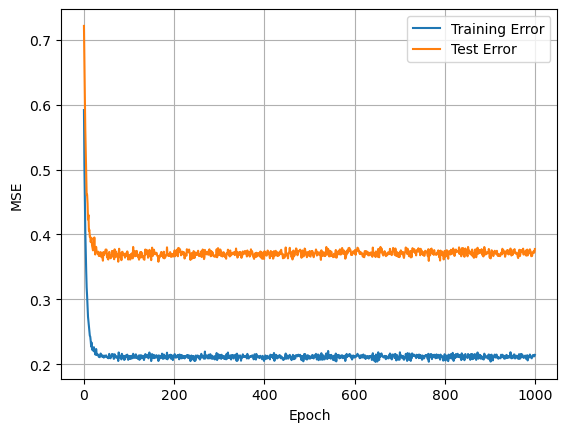

In [114]:
plt.figure(dpi=100)
sns.lineplot(x=trained_model.epoch, y=trained_model.history['loss'], label="Training Error")
sns.lineplot(x=trained_model.epoch, y=trained_model.history['val_loss'], label="Test Error")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.grid()
plt.show()

In [115]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.1942


0.1990811973810196

In [110]:
np.sqrt(0.2037)

0.4513313638558703

In [49]:
y_est = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


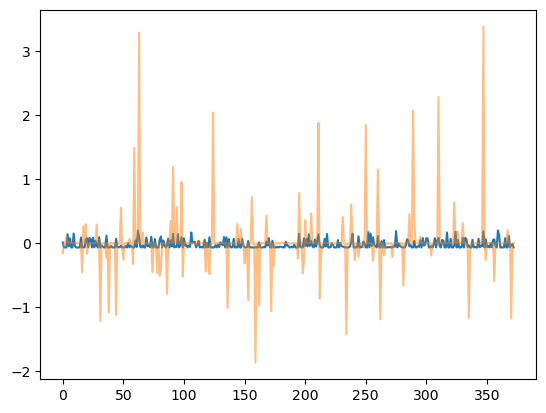

In [50]:
plt.plot(y_est)
plt.plot(y_test, alpha=0.5)

In [51]:
X_test.shape

(373, 6)

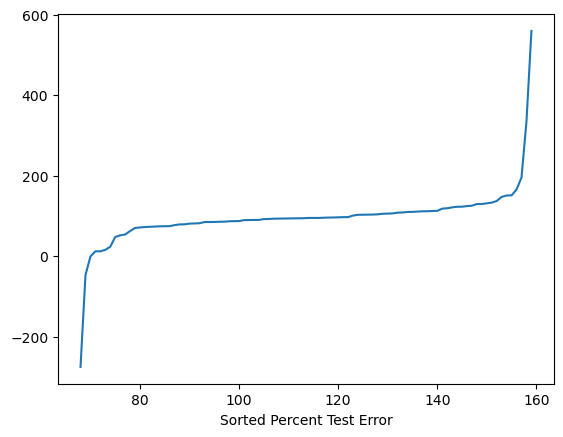

In [52]:
rel_error = 100 * (y_test - y_est.reshape(1,-1))/y_test
rel_error.sort()

plt.plot(rel_error[0])
plt.xlabel("Sorted Percent Test Error")
plt.show()